In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('housing.csv')

In [2]:
#RM - average number of rooms per dwelling
#PTRATIO - pupil-teacher ratio by town
#LSTAT - % lower status of the population
#MEDV - Median value of owner-occupied homes

In [3]:
df.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [4]:
df.shape

(489, 4)

In [5]:
df.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


In [6]:
#Checks for blanks
zero_counts={ 'RM': df['RM'].isnull().sum() , 'LSTAT': df['LSTAT'].isnull().sum() ,'PTRATIO': df['PTRATIO'].isnull().sum() ,
 'MEDV': df['MEDV'].isnull().sum()}
zero_counts

{'RM': 0, 'LSTAT': 0, 'PTRATIO': 0, 'MEDV': 0}

In [7]:
prices = df['MEDV']
features = df.drop('MEDV', axis = 1)

In [8]:
minimum_price = np.mean(prices)

maximum_price = np.max(prices)

mean_price = np.mean(prices)

median_price = np.median(prices)

std_price = np.std(prices)

print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${:,.2f}".format(minimum_price))
print("Maximum price: ${:,.2f}".format(maximum_price))
print("Mean price: ${:,.2f}".format(mean_price))
print("Median price ${:,.2f}".format(median_price))
print("Standard deviation of prices: ${:,.2f}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $454,342.94
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


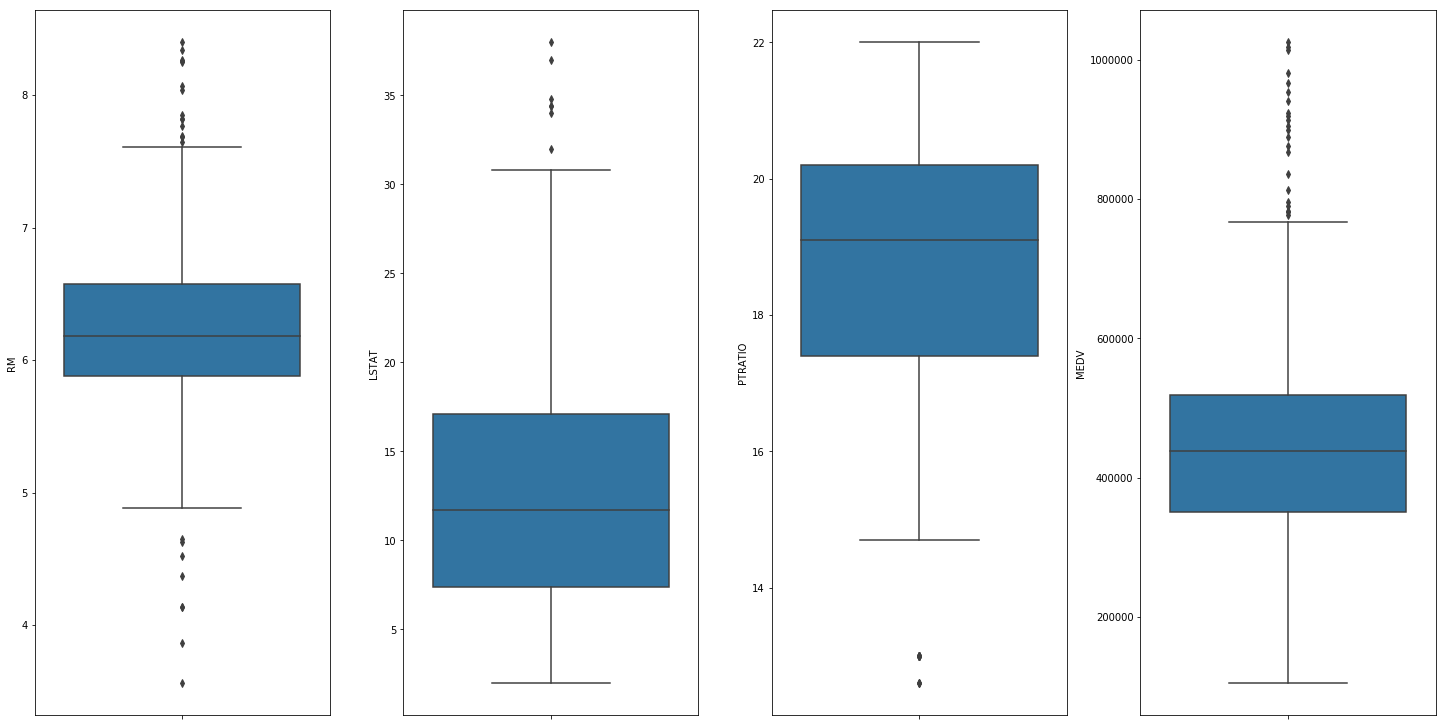

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

fig, axs = plt.subplots(ncols=4, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [10]:
 for k, v in df.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column RM outliers = 4.50%
Column LSTAT outliers = 1.43%
Column PTRATIO outliers = 2.66%
Column MEDV outliers = 4.50%


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


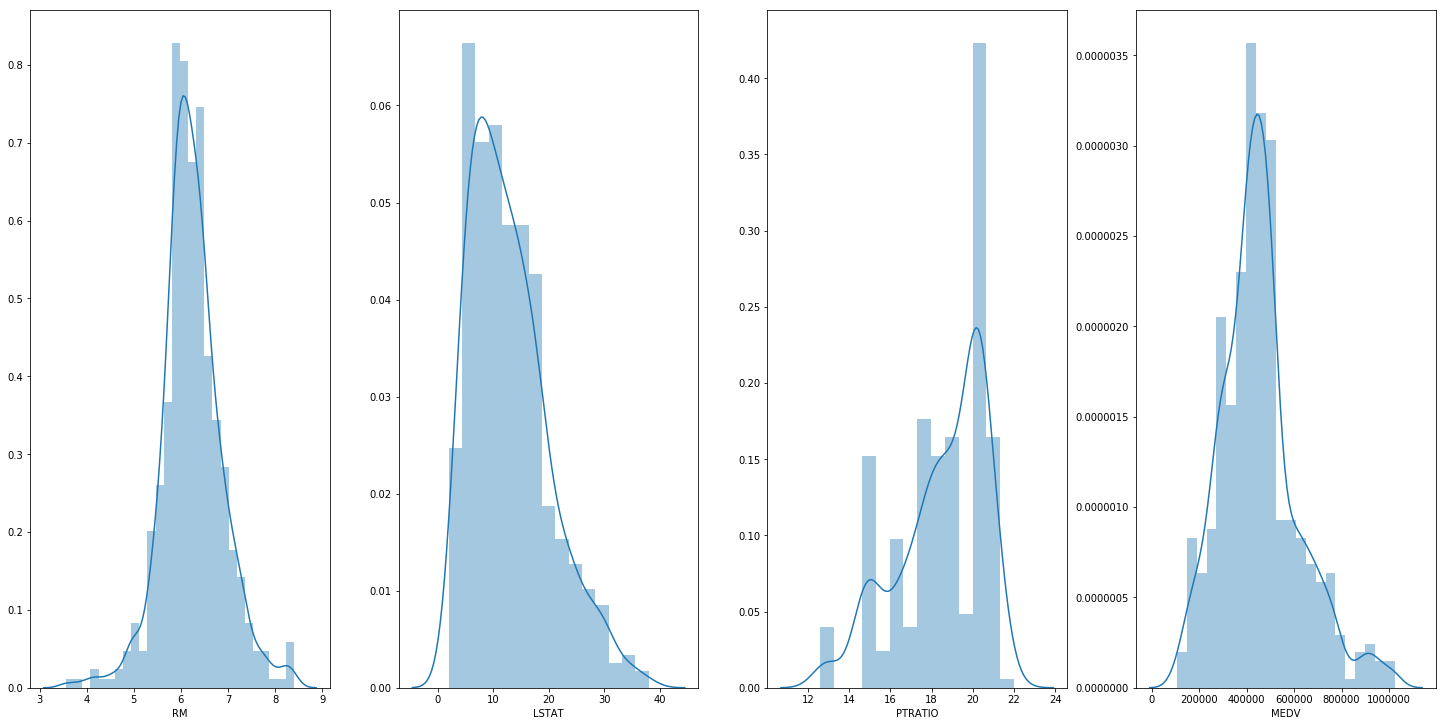

In [11]:
fig, axs = plt.subplots(ncols=4, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

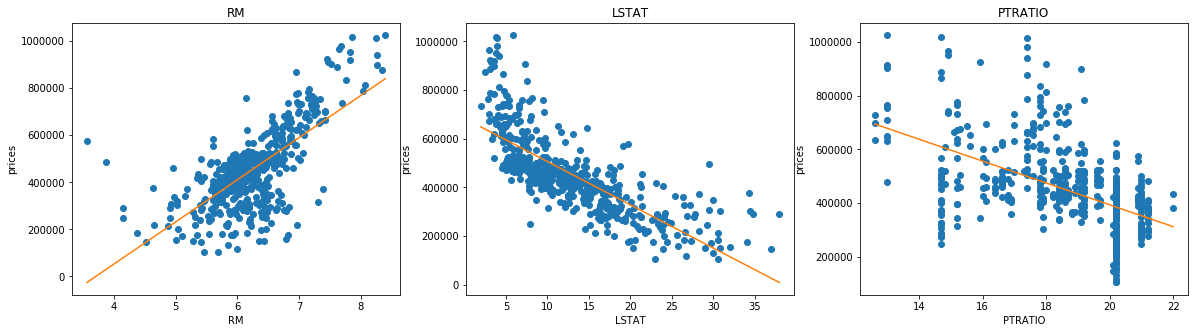

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 5))


for i, col in enumerate(features.columns):
    plt.subplot(1, 3, i+1)
    x = df[col]
    y = prices
    plt.plot(x, y, 'o')
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('prices')

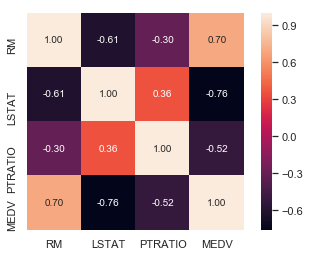

In [13]:
# Correlation Matrix

cor_matrix = np.corrcoef(df[df.columns].values.T) # We transpose to get the data by columns. Columns become rows.
sns.set(font_scale=1)
cor_heat_map = sns.heatmap(cor_matrix,
 cbar=True,
 annot=True,
 square=True,
 fmt='.2f',
 annot_kws={'size':10},
 yticklabels=df.columns,
 xticklabels=df.columns)

plt.show()

In [14]:
# Creating deep copy of original dataframe
dff=df.copy(deep=True)

In [15]:
dff.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [16]:
# Standardizing values
#from sklearn.preprocessing import StandardScaler
#num_values1=dff.select_dtypes(['float64','int64']).columns
#scaler = StandardScaler()
#scaler.fit(dff[num_values1])
#dff[num_values1]=scaler.transform(dff[num_values1])


In [17]:
dff.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [18]:
x = dff.drop(['MEDV'],axis = 1)
y = dff['MEDV']

In [19]:
x.head()

,RM,LSTAT,PTRATIO
0,6.575,4.98,15.3
1,6.421,9.14,17.8
2,7.185,4.03,17.8
3,6.998,2.94,18.7
4,7.147,5.33,18.7


In [20]:
y.head()

0    504000.0
1    453600.0
2    728700.0
3    701400.0
4    760200.0
Name: MEDV, dtype: float64

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 33)

In [22]:
# Applying linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)

In [37]:
cdf = pd.DataFrame(lr.coef_, x.columns, columns=['Coefficients'])
print(cdf)

          Coefficients
RM       101531.590718
LSTAT    -10339.762883
PTRATIO  -19486.036811


In [23]:
#R^2 score
lr.score(X_test, y_test)

0.6083795028938153

In [24]:
# Applying random forest
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred_rfr = rfr.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [41]:
rfr.decision_path(x)

(<489x4218 sparse matrix of type '<class 'numpy.int64'>'
 	with 51024 stored elements in Compressed Sparse Row format>,
 array([   0,  429,  858, 1291, 1696, 2131, 2558, 2969, 3364, 3791, 4218],
       dtype=int32))

In [25]:
#R^2 score
rfr.score(X_test,y_test)

0.7836995149760257

In [26]:
dff['PRED_MEDV_LR']=lr.predict(df.drop(['MEDV'],axis = 1))

In [27]:
dff['PRED_MEDV_RF']=rfr.predict(df.drop(['MEDV'],axis = 1))

In [28]:
dff.head(10)

,RM,LSTAT,PTRATIO,MEDV,PRED_MEDV_LR,PRED_MEDV_RF
0,6.575,4.98,15.3,504000.0,630636.304650,618870.0
1,6.421,9.14,17.8,453600.0,523271.934059,488040.0
2,7.185,4.03,17.8,728700.0,653678.257698,735840.0
3,6.998,2.94,18.7,701400.0,628424.758645,712530.0
4,7.147,5.33,18.7,760200.0,618840.932373,748860.0
5,6.430,5.21,18.7,602700.0,547283.553374,539070.0
6,6.012,12.43,15.2,480900.0,498391.389281,475020.0
7,6.172,19.15,15.2,569100.0,445153.237224,513660.0
8,5.631,29.93,15.2,346500.0,278762.002770,336840.0
9,6.004,17.10,15.2,396900.0,449292.443893,418740.0


In [29]:
# standard deviation of the dataframe
dff.std()

RM                   0.643650
LSTAT                7.081990
PTRATIO              2.111268
MEDV            165340.277653
PRED_MEDV_LR    144887.135403
PRED_MEDV_RF    158836.073064
dtype: float64

In [30]:
dff.mean()

RM                   6.240288
LSTAT               12.939632
PTRATIO             18.516564
MEDV            454342.944785
PRED_MEDV_LR    451673.698602
PRED_MEDV_RF    452784.478528
dtype: float64

In [31]:
dff.shape

(489, 6)

In [32]:
# Z score for Linear Regression
import math
s1=165340.277653
s2=144887.135403
n1=489
n2=489
x1=454342.944785
x2=451673.698602
den=math.sqrt((s1*s1)/n1+(s2*s2)/n2)
Z=(x1-x2)/den
print(Z)
if Z<1.96:
    print("Since calculated value of Z is less than the critical Z i.e. 1.96, Null Hypothesis is accepted for Linear Regression")
else:
    print("Null hypothesis is rejected for Linear Regression")

0.2684949105149169
Since calculated value of Z is less than the critical Z i.e. 1.96, Null Hypothesis is accepted for Linear Regression


In [33]:
# Z score for Random Forest
import math
s1=165340.277653
s2=159297.471406
n1=489
n2=489
x1=454342.944785
x2=453587.116564
den=math.sqrt((s1*s1)/n1+(s2*s2)/n2)
Z=(x1-x2)/den
print(Z)
if Z<1.96:
    print("Since calculated value of Z is less than the critical Z i.e. 1.96, Null Hypothesis is accepted for Random Forest")
else:
    print("Null hypothesis is rejected for Random Forest")

0.07279780558113479
Since calculated value of Z is less than the critical Z i.e. 1.96, Null Hypothesis is accepted for Random Forest


In [43]:
dff.to_csv("predicted_housing_prices.csv")